<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/tensors/tensors_four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title Imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


## Convolutional neural nets and comp-vision

CNNs are normally used for text/image data.
Working with [food data](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) .

It contains 101 different categories, and 1000 real-world images per category.

### Getting and Setting the data

In [1]:

# downloading the zip file and working on it
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-10-09 22:05:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c03::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   181MB/s    in 0.6s    

2023-10-09 22:05:58 (181 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak
classes = [
    'Pizza',
    'Steak'
]

test  train


All the leaf-directories ['pizza_steak/test/steak', 'pizza_steak/test/pizza', 'pizza_steak/train/steak', 'pizza_steak/train/pizza']
Image Dimensions :  (384, 512, 3)


(-0.5, 511.5, 383.5, -0.5)

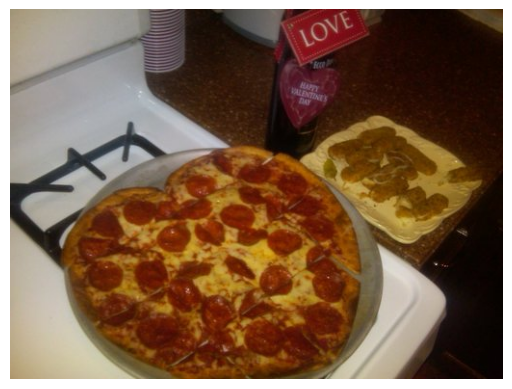

In [6]:
#@title Getting a random file and file-list from the dataset
import os  # for working with files
import matplotlib.image as mpimg # for using image file-path as image

root_dir = 'pizza_steak'

# function to find all the leaf directories
def get_leaf_dirs(directory):
    leaf_dirs = []
    for root, dirs, files in os.walk(directory):
        if not dirs : # if there are no more directories then it is a leaf directory
            leaf_dirs.append(root)
    return leaf_dirs

# Getting all the leaf directories
leaf_dirs = get_leaf_dirs(root_dir)
print(
    f'All the leaf-directories {leaf_dirs}'
)

# select a leaf directory
rand_leaf_dir = random.choice(leaf_dirs)
# rand_leaf_dir
files = os.listdir(rand_leaf_dir)


# viewing an image
image = mpimg.imread(os.path.join(rand_leaf_dir, random.choice(files)))
print('Image Dimensions : ', image.shape)
plt.imshow(image)
plt.axis('off')


Shape of image is like : width, height, color-channels

color-channels are RGB, these will remain same for all the images, so fixed dimesion of colorful images is like
(width, height, 3)

In [7]:
image / 255. , image.shape

(array([[[0.61960784, 0.58431373, 0.4627451 ],
         [0.62352941, 0.58823529, 0.46666667],
         [0.62745098, 0.58431373, 0.46666667],
         ...,
         [0.2745098 , 0.17254902, 0.03529412],
         [0.27058824, 0.16470588, 0.04705882],
         [0.26666667, 0.16078431, 0.04313725]],
 
        [[0.62352941, 0.58823529, 0.46666667],
         [0.62352941, 0.58823529, 0.46666667],
         [0.63137255, 0.58823529, 0.47058824],
         ...,
         [0.27843137, 0.17647059, 0.03921569],
         [0.28235294, 0.16862745, 0.04313725],
         [0.27058824, 0.16470588, 0.04705882]],
 
        [[0.62745098, 0.58431373, 0.46666667],
         [0.62745098, 0.58431373, 0.46666667],
         [0.63137255, 0.58823529, 0.47058824],
         ...,
         [0.29803922, 0.18431373, 0.05098039],
         [0.29803922, 0.17647059, 0.05490196],
         [0.28627451, 0.17254902, 0.04705882]],
 
        ...,
 
        [[0.67843137, 0.58823529, 0.42745098],
         [0.68235294, 0.59215686, 0.43137

[Typical architecture of convolutional network](https://github.com/krahul2024/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb)

Different layers in convolutional nets
* Input layer : input_shape consists of
 [
    `batch_size`, `image_height`,`image_width`, `color_channels`]  
* Convolutional layer : For extraction of most important features from the images.
can be created with `tf.keras.layers.ConvXD` , x can be multiple values
* Hidden activation : typical activation functions like `relu`, `sigmoid` etc.
* Pooling layer : To reduce the dimensionality of learned image features, can be done using `keras.layers.AvgPool2D` or `keras.layers.MaxPool2D`
* Fully connected layer : To further refine learned features from convolutional layers, can be done using typical `layers.Dense`
* Ouput layer : You know it.
* Output activation : `sigmoid` for binary and `softmax` for multiclass.

Baseline : It is bare minimum which you want to achieve, for this dataset the authors achieved 50.76% using random-forest machine learning model.

##  Working on CNNs

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# initializing the image data generator
train_datagen = ImageDataGenerator(rescale = 1. / 255.)
valid_datagen = ImageDataGenerator(rescale = 1. / 255. )

# Data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# importing data from directories and do the batching
train_data = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    target_size = (224, 224), # convert all the images to 224 x 224 size
    class_mode = 'binary',
    seed = 42
)
valid_data = valid_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    target_size = (224, 224) ,
    class_mode = 'binary',
    seed = 42
)

# creating a cnn model
model_one = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = 'relu',
        input_shape = (224, 224, 3),
    ),
    tf.keras.layers.Conv2D(
        10, 3, activation = 'relu'
    ),
    tf.keras.layers.Conv2D(
        10, 3, activation = 'relu'
    ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile the model
model_one.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'],
)

# training or fitting the model
history_one = model_one.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data),
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
33/47 [====================>.........] - ETA: 31s - loss: 0.7690 - accuracy: 0.5551